In [212]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams.update({ 'font.size': 14 })
import os
from cycler import cycler

cm = ['#377eb8', '#ff7f00', '#4daf4a', '#999999', '#e41a1c', '#a65628', '#984ea3',
                  '#f781bf', '#dede00','#000000']
plt.rc('axes', prop_cycle = cycler('color', cm))
viridis = plt.cm.get_cmap('viridis', 7)(np.linspace(0, 1, 7))
plt.rc('font', **{'family':'sans-serif','sans-serif':['Arial'], 'size': 8})

In [213]:
chi2 = pd.DataFrame(index=['αSyn','A2 LCD','FUS LCD','OPN','ht40'],
                   columns=['1.00','1.10','1.12'])
chi2E = chi2.copy()
chi2_4 = chi2.copy()
chi2_6 = chi2.copy()
chi2_8 = chi2.copy()
rho = chi2.copy()
rhoE = chi2.copy()
tau_c = chi2.copy()
for i,(name,labelname) in enumerate(zip(['aSyn_PRE','A2','FUS','OPN','htau40'],chi2.index)):
    prot = pd.read_pickle(
        '../PRE_NMR/intrachain/chi2_{:s}_tc.pkl'.format(name)).astype(float)
    prot_rho = pd.read_pickle(
        '../PRE_NMR/intrachain/rs_{:s}_tc.pkl'.format(name)).astype(float)
    prot.columns = ['{:.2f}'.format(i) for i in prot.columns.values]
    prot_rho.columns = ['{:.2f}'.format(i) for i in prot_rho.columns.values]
    chi2.loc[labelname] = prot.loc[[4.0,5.0,6.0,7.0,8.0]].mean()
    chi2_4.loc[labelname] = prot.loc[4.0]
    chi2_6.loc[labelname] = prot.loc[6.0]
    chi2_8.loc[labelname] = prot.loc[8.0]
    chi2E.loc[labelname] = prot.loc[[4.0,5.0,6.0,7.0,8.0]].std()
    rho.loc[labelname] = prot_rho.loc[[4.0,5.0,6.0,7.0,8.0]].mean()
    rhoE.loc[labelname] = prot_rho.loc[[4.0,5.0,6.0,7.0,8.0]].mean()
    tau_c.loc[labelname] = prot.idxmin()

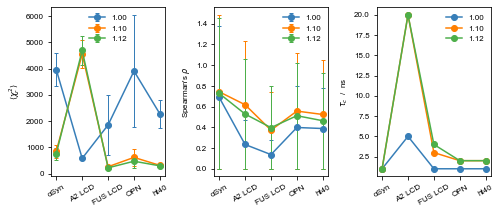

In [214]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(7,3))

chi2.plot(ax=ax1,yerr=chi2E,marker='o',rot=30, elinewidth=1, capsize=2, capthick=1)
ax1.legend(frameon=False)
ax1.set_xticks(range(5))
ax1.set_xticklabels(chi2.index)

rho.plot(ax=ax2,yerr=rhoE,marker='o',rot=30, elinewidth=1, capsize=2, capthick=1)

ax2.legend(frameon=False)
ax2.set_xticks(range(5))
ax2.set_xticklabels(rho.index)

tau_c.plot(ax=ax3,marker='o',rot=30)
ax3.legend(frameon=False)
ax3.set_xticks(range(5))
ax3.set_xticklabels(tau_c.index)


ax1.set_ylabel(r'$\langle \chi^2_r \rangle$')
ax2.set_ylabel(r"Spearman's $\rho$")
ax3.set_ylabel(r'$\tau_c$  /  ns')

plt.tight_layout()
plt.show()

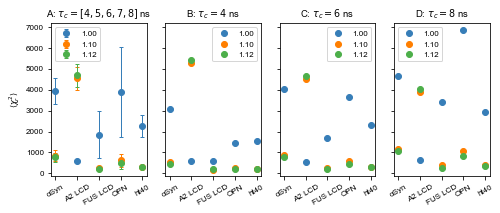

In [215]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(7,3))

chi2.plot(ax=ax1,yerr=chi2E,marker='o',rot=30, elinewidth=1, capsize=2, capthick=1, lw=0)
ax1.legend(frameon=True)
ax1.set_xticks(range(5))
ax1.set_xticklabels(chi2.index)

chi2_4.plot(ax=ax2,marker='o',rot=30, lw=0)
#ax2.legend(frameon=True)
ax2.set_xticks(range(5))
ax2.set_xticklabels(rho.index)

chi2_6.plot(ax=ax3,marker='o',rot=30, lw=0)
#ax3.legend(frameon=True)
ax3.set_xticks(range(5))
ax3.set_xticklabels(rho.index)

chi2_8.plot(ax=ax4,marker='o',rot=30, lw=0)
#ax4.legend(frameon=True)
ax4.set_xticks(range(5))
ax4.set_xticklabels(tau_c.index)

ax1.set_ylabel(r'$\langle \chi^2_r \rangle$')

ax1.set_title(r'A: $\tau_c=[4, 5, 6, 7, 8]$ ns')
ax2.set_title(r'B: $\tau_c=4$ ns')
ax3.set_title(r'C: $\tau_c=6$ ns')
ax4.set_title(r'D: $\tau_c=8$ ns')

plt.tight_layout()
plt.savefig('../intraPRE.pdf')

In [198]:
def plotPREdata(name,prot,obs,c,legend):
    calcPREs = prot.calcPREs
    expPREs = prot.expPREs
    labels = prot.calcPREs.columns
    cols = 1 if len(labels)<6 else 2
    rows = int(len(labels) / cols)
    if obs == 1:
        ylabel = '$I_{para}$  /  $I_{dia}$' 
    else:
        ylabel = '$\Gamma_2$  /  Hz' 
        
        
    ymin = calcPREs.min().min()
    ymax = calcPREs.max().max()
    
    chi2 = 0
    for ax,label in zip(axes.flatten(),labels):
        ax.errorbar(expPREs.index,expPREs.value[label],expPREs.error[label], 
            color='k', lw=0, marker='o', ms=1, elinewidth=.5, capsize=1, capthick=.5)    
        ax.plot(calcPREs[label].index,calcPREs[label].values,color=c,
                lw=0.5,marker='o',ms=1,label=legend)
        mask = np.isfinite(calcPREs[label])&np.isfinite(expPREs.value[label].values)
        chi = (expPREs.value[label].values[mask] - calcPREs[label][mask]) \
        / expPREs.error[label].values[mask]
        chi2 += np.nansum( np.power( chi, 2) ) / chi.size 
        if obs == 2:
            ax.set_yscale('log')
        ax.set_xticks(calcPREs.index[9::10])
        if calcPREs.index.size>200:
            ax.set_xticks(calcPREs.index[9::30])
        if calcPREs.index.size>400:
            ax.set_xticks(calcPREs.index[9::60])
        ax.set_ylabel(ylabel)
        if obs == 2:
            ax.set_ylim(ymin,ymax)
        else:
            ax.set_ylim(-.1,1.1)
    if cols == 2:
        axes.flatten()[-2].set_xlabel('Residue #')
        for i in np.arange(len(labels))[1::2]:
            axes.flatten()[i].yaxis.set_label_position("right")
            axes.flatten()[i].yaxis.set_ticks_position('right')
    print(legend,chi2/len(labels))
    axes.flatten()[-1].set_xlabel('Residue #')
    plt.tight_layout(w_pad=0.5)

1 4036.7700551221315
1.1 858.8164169069447
1.12 769.1694997538359


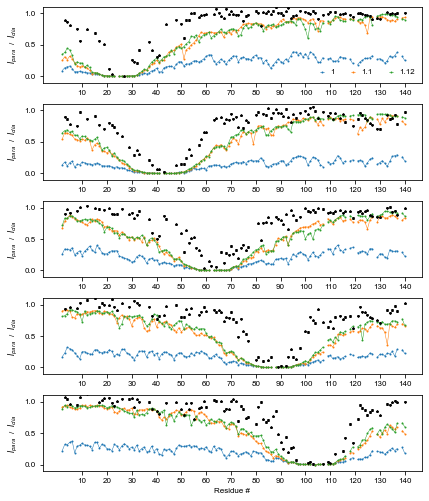

In [216]:
name = 'aSyn_PRE'  

prot = pd.read_pickle('../PRE_NMR/intrachain/'+name+'_PREs.pkl')
figsize = (6,4)
labels = prot[1.00].calcPREs.columns
cols = 1 if len(labels)<6 else 2
rows = int(len(labels) / cols)
if len(labels)>6 or len(labels)==5:
    figsize = (6,7)
fig, axes = plt.subplots(rows, cols, sharex=False, sharey=False, figsize=figsize)
for l,c in zip(prot.columns,['tab:blue','tab:orange','tab:green']):
    pre = prot[l]
    plotPREdata(name,pre,1,c,legend='{:g}'.format(l))
plt.tight_layout()
axes[0].legend(frameon=False,ncol=4,handlelength=.5)
plt.savefig('../aSyn.pdf')
plt.show()

1 1697.4571384236958
1.1 246.75392065612962
1.12 212.13486704945203


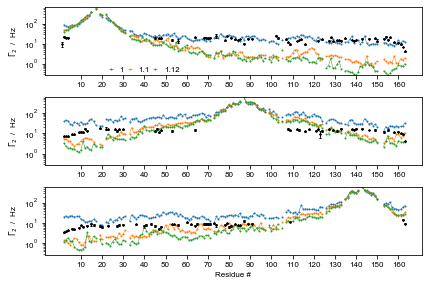

In [217]:
plt.rc('font', **{'family':'sans-serif','sans-serif':['Arial'], 'size': 8})

name = 'FUS'    
    
prot = pd.read_pickle('../PRE_NMR/intrachain/'+name+'_PREs.pkl')
figsize = (6,4)
labels = prot[1.00].calcPREs.columns
cols = 1 if len(labels)<6 else 2
rows = int(len(labels) / cols)
if len(labels)>6 or len(labels)==5:
    figsize = (6,7)
fig, axes = plt.subplots(rows, cols, sharex=False, sharey=False, figsize=figsize)
for l,c in zip(prot.columns,['tab:blue','tab:orange','tab:green']):
    pre = prot[l]
    plotPREdata(name,pre,2,c,legend='{:g}'.format(l))
plt.tight_layout()
axes[0].legend(frameon=False,ncol=3,handlelength=.5,labelspacing=0,
                  columnspacing=.5,borderpad=0,loc=(.17,.03))
plt.savefig('../FUS.pdf')
plt.show()

1 539.4803605685507
1.1 4502.599999796668
1.12 4645.413653696693


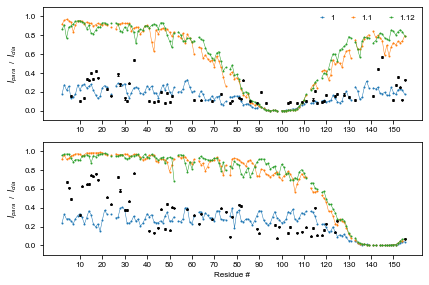

In [218]:
name = 'A2'  

prot = pd.read_pickle('../PRE_NMR/intrachain/'+name+'_PREs.pkl')
figsize = (6,4)
labels = prot[1.00].calcPREs.columns
cols = 1 if len(labels)<6 else 2
rows = int(len(labels) / cols)
if len(labels)>6 or len(labels)==5:
    figsize = (6,7)
fig, axes = plt.subplots(rows, cols, sharex=False, sharey=False, figsize=figsize)
for l,c in zip(prot.columns,['tab:blue','tab:orange','tab:green']):
    pre = prot[l]
    plotPREdata(name,pre,1,c,legend='{:g}'.format(l))
plt.tight_layout()
axes[0].legend(frameon=False,ncol=4,handlelength=.5)
plt.savefig('../A2.pdf')
plt.show()

1 3649.6823059916323
1.1 571.1499525070923
1.12 435.9572666753522


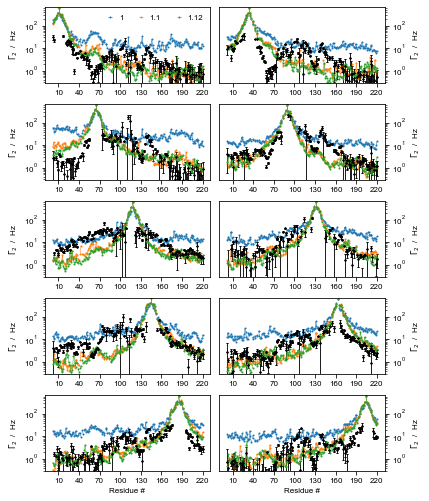

In [219]:
name = 'OPN'  

prot = pd.read_pickle('../PRE_NMR/intrachain/'+name+'_PREs.pkl')
figsize = (6,4)
labels = prot[1.00].calcPREs.columns
cols = 1 if len(labels)<6 else 2
rows = int(len(labels) / cols)
if len(labels)>6 or len(labels)==5:
    figsize = (6,7)
fig, axes = plt.subplots(rows, cols, sharex=False, sharey=False, figsize=figsize)
for l,c in zip(prot.columns,['tab:blue','tab:orange','tab:green']):
    pre = prot[l]
    plotPREdata(name,pre,2,c,legend='{:g}'.format(l))
plt.tight_layout()
axes[0,0].legend(frameon=False,ncol=4,handlelength=.5)
plt.savefig('../OPN.pdf')
plt.show()

1 2310.930249876838
1.1 314.1455843745104
1.12 296.3332929516935


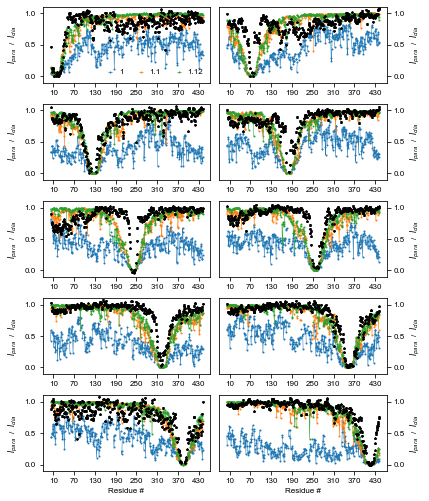

In [220]:
name = 'htau40'  

prot = pd.read_pickle('../PRE_NMR/intrachain/'+name+'_PREs.pkl')
figsize = (6,4)
labels = prot[1.00].calcPREs.columns
cols = 1 if len(labels)<6 else 2
rows = int(len(labels) / cols)
if len(labels)>6 or len(labels)==5:
    figsize = (6,7)
fig, axes = plt.subplots(rows, cols, sharex=False, sharey=False, figsize=figsize)
for l,c in zip(prot.columns,['tab:blue','tab:orange','tab:green']):
    pre = prot[l]
    plotPREdata(name,pre,1,c,legend='{:g}'.format(l))
plt.tight_layout()
axes[0,0].legend(frameon=False,ncol=4,handlelength=.5)
plt.savefig('../ht40.pdf')
plt.show()